In [21]:
#IMPLEMENT THE DETECTTION OF EYE OR FACE OR SMILE FROM THE IMAGE

In [22]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [23]:
#Load models
face_cascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smile_cascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

In [24]:
#EXAMPLE

Image: 


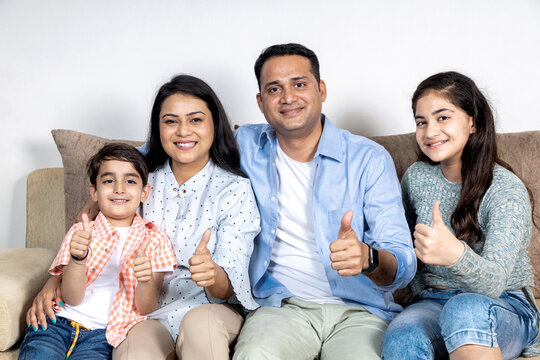

In [25]:
img=cv2.imread('download.jpg')
print("Image: ")
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Grayscale Image


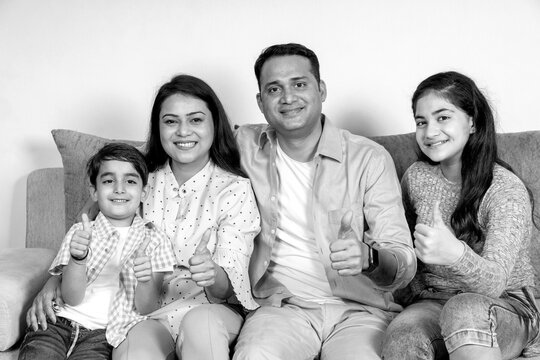

In [26]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("Grayscale Image")
cv2_imshow(gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

Image:


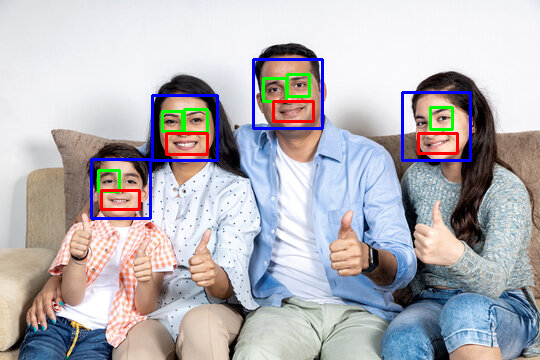

In [27]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
  img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyes= eye_cascade.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

  smile=smile_cascade.detectMultiScale(roi_gray)
  for (sx,sy,sw,sh) in smile:
    cv2.rectangle(roi_color,(sx,sy),(sx+sw,sy+sh),(0,0,255),2)

print("Image:")
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

array([[[213, 208, 205],
        [214, 209, 206],
        [214, 209, 206],
        ...,
        [236, 232, 227],
        [235, 231, 226],
        [235, 231, 226]],

       [[214, 209, 206],
        [214, 209, 206],
        [215, 210, 207],
        ...,
        [238, 234, 229],
        [236, 232, 227],
        [236, 232, 227]],

       [[215, 210, 207],
        [215, 210, 207],
        [216, 211, 208],
        ...,
        [239, 234, 231],
        [238, 233, 230],
        [237, 232, 229]],

       ...,

       [[148, 184, 208],
        [155, 191, 215],
        [157, 193, 217],
        ...,
        [155, 185, 204],
        [158, 187, 208],
        [164, 193, 214]],

       [[146, 183, 205],
        [150, 187, 209],
        [155, 192, 214],
        ...,
        [153, 185, 208],
        [150, 181, 204],
        [156, 187, 210]],

       [[163, 200, 222],
        [158, 195, 217],
        [155, 192, 214],
        ...,
        [158, 190, 213],
        [161, 193, 216],
        [158, 189, 210]]], dtype=uint8)
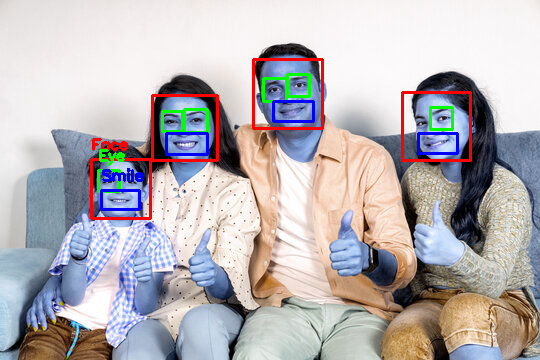

In [28]:
cv2.putText(img, 'Smile', (x + sx, y + sy - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)  # Add text for smiles
cv2.putText(img, 'Face', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)  # Add text for faces
cv2.putText(img, 'Eye', (x + ex, y + ey - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)  # Add text for eyes